# Градиентное обучение на примере линейной регрессии

## Исходные данные

Для этого занятия нам понадобится файл `non_linear.csv` который хранится в [директории курса на Google Drive](https://drive.google.com/file/d/1prHJVpHn0N5y1BqLQQ2Hpx5OP8uKIXjT/view?usp=sharing)

Скопируйте файл к себе в родительскую директорию **hse_nlp_2021**

In [1]:
import logging
import os
import shutil 

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

ROOT_DIR = '/content/drive' 
drive.mount(ROOT_DIR)
logger.info('Подключили диск')

root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'hse_nlp_2021')
if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

2022-01-30 11:54:11,266 : INFO : Инициализировали логгер
2022-01-30 11:54:32,371 : INFO : Подключили диск


Mounted at /content/drive


2022-01-30 11:54:32,692 : INFO : Содержимое директории /content/drive/MyDrive/hse_nlp_2021: ['events.csv', '1000k_memes_ocr.tar.gz', 'nyt-ingredients-snapshot-2015.csv', 'insurance.csv', 'Class_1.ipynb', 'corpora', 'sklearn_data', 'nltk_data', 'logs', 'nltk_data_old', 'Копия блокнота "Part_I:ML_intro.ipynb"', 'non_linear.csv', 'Untitled', 'Копия блокнота "Part_II:gradient_descent.ipynb"']


Прочитаем `non_linear.csv`

In [3]:
import os

import numpy as np
import pandas as pd

raw_data_file = os.path.join(root_data_dir, 'non_linear.csv')
data = pd.read_csv(raw_data_file, sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Визуализируем данные

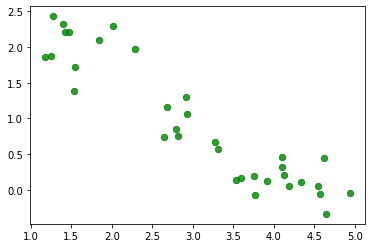

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(
    data.x_train, data.y_train,
    s=40, c='g', marker='o', alpha=0.8
)
plt.show()

Создадим две отдельные переменные

* $y$ для целевой переменной из столбца `y_train`. Удалим из исходного датафрейма с помощью `.drop()`
* Все оставшиеся после удаления столбцы - это матрица объекты-признаки $X$

Для матрицы объекты-признаки добавляем "дефолтный" признак из единиц.

In [20]:
num_examlpes = data.shape[0]
num_features = data.shape[0] - 1  # вычитаем единичку т.к. убрали столбец y
X = np.zeros((num_examlpes, num_features + 1))  # размерность увеличилась на дефолтный столбец

y = data.y_train # target (целевая переменная)
X_df = data.drop('y_train', axis=1) # удаляем столбец y_train
print(X.shape, type(X))

(34, 34) <class 'numpy.ndarray'>


In [21]:
type(X_df.values)

numpy.ndarray

In [22]:
np.hstack(X_df.values) # hstack = складываем по горизонтали, vst = по вертикали

array([1.18242126, 1.25160548, 1.27047391, 1.40255288, 1.42771078,
       1.4717371 , 1.53463185, 1.55350027, 1.84281611, 2.01892141,
       2.28936882, 2.64157941, 2.68560573, 2.79881628, 2.82397418,
       2.91202682, 2.92460577, 3.27052689, 3.31455321, 3.52839535,
       3.59757958, 3.76110592, 3.77368487, 3.91834279, 4.10702703,
       4.10702703, 4.12589546, 4.1887902 , 4.33344812, 4.54100079,
       4.57244817, 4.62276396, 4.64163239, 4.9372377 ])

In [25]:
X = np.hstack([np.ones(num_examlpes).reshape(-1, 1), X_df.values])

In [27]:
X.shape

(34, 2)

Создаём отложенную выборку для валидации - см. предыдущий семинар

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### Аналитическое решение

Для начала напишем код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


In [89]:
from numpy.linalg import inv # функция для обращения матрицы
import numpy as np

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(num_features)
#-------- ВАШ КОД ТУТ -------------------
X_T_X = X_train.T.dot(X_train)
inv_X_T_X = inv(X_T_X)
inv_X_T_X_dot_X = inv_X_T_X.dot(X_train.T)
w_analytic = inv_X_T_X_dot_X.dot(y_train.values.reshape(-1,1))

# print(inv_X_T_X_dot_X.shape)



#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [[ 2.92602711]
 [-0.66129539]]


In [87]:
print(y.shape) # надо делать решейп, чтобы было 34 на 1

(34,)


In [88]:
type(y.values.reshape(-1,1))

numpy.ndarray

***ОТВЕТ: y = 2.93 + x * (-0.66)***

Плучите коэффициенты из класса `LinearRegression` - мы уже делали так на прошлом семинаре

In [97]:
from sklearn.linear_model import LinearRegression
#-------- ВАШ КОД ТУТ -------------------

lr_simple = LinearRegression(fit_intercept=False) #  надо доп добавить столбец из единиц
lr_simple.fit(X, y)




#----------------------------------------

LinearRegression(fit_intercept=False)

In [98]:
lr_simple.coef_

array([ 2.97817452, -0.67683741])

In [51]:
help(lr_simple.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [99]:
# another option
lr_simple_1 = LinearRegression(fit_intercept=True) #дефолтное значение
lr_simple_1.fit(data.drop('y_train', axis=1), y)

LinearRegression()

In [100]:
lr_simple_1.coef_

array([-0.67683741])

In [101]:
lr_simple.intercept_, lr_simple.coef_

(0.0, array([ 2.97817452, -0.67683741]))

In [102]:
lr_simple_1.intercept_, lr_simple_1.coef_

(2.978174519094626, array([-0.67683741]))

Сравните по евклидовому расстоянию коэффициенты из класса `LinearRegression` и полученные аналитическим способом

In [ ]:
from numpy.linalg import inv, norm

#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

Проверка на правильность - пишем юнит-тест!

In [ ]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

## Градиентный спуск из sklearn

Используем готовую реализацию и функцию [.fit_partial()](https://scikit-learn.org/0.15/modules/scaling_strategies.html#incremental-learning)

Для градиентного спуска мы используем готовый класс [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Класс принимает следующие параметры

* `learning_rate='constant'` используем самую простую модификацию спуска из нескольких возможных (см. доументацию)
* `eta0=0.009` - шаг градиентного спуска, в формуле мы его обозначали буквой $\alpha$
* `fit_intercept=True` - чтобы обучить коэффициент при "свободном члене" $w_0$ линейной регрессии (см. лекцию)
* `random_state=RANDOM_SEED` - этот параметр встречали ранее в этом модуле, он нужен для воспроизводимости вычислений.

Псевдокод решения (нужно закодить самостоятельно, если возникнут сложности - подсмотреть в лекции):

* инициализируем `w_current` рандомом, `weight_evolution` и `rmse_evolution` пустыми списками, и критерий остановки $\varepsilon=0.0001$
* задаём максимальное число шагов `800` и далее на каждом шаге
  * вызываем `.partial_fit`
  * `.coef_` содержит текущие веса - применяем [from scipy.spatial.distance.euclidean](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean) и сверяем с критерием остановки. Если критерий не выполняется - обновляем rmse с помощью [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) на `y_valid` и предикт на `X_valid` и переназначаем `w_current` на атрибут `.coef_.copy()`

Когда критерий остановки выполнился - визуализируем `rmse_evolution`, мы должны увидеть т.н. кривую обучения с помощью `.plot(range(step), rmse_evolution)`

Новая библиотека в нашем арсенале  - scipy, изучите её документацию

In [105]:
y = data.y_train
X = data.drop('y_train', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [107]:
X_train #данные без единичек

,x_train
17,2.685606
37,4.641632
14,2.018921
5,1.182421
9,1.427711
21,2.924606
22,3.270527
10,1.471737
18,2.798816
16,2.641579


2022-01-30 14:07:45,111 : INFO : Обучение закончилось
2022-01-30 14:07:45,115 : INFO : Количество пройденных итераций 160


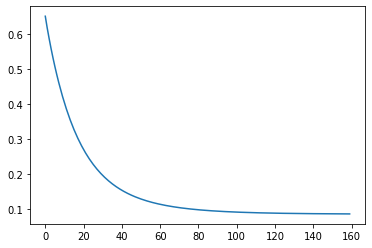

In [117]:
from numpy.linalg import inv, norm
from sklearn.linear_model import SGDRegressor
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error
#-------- ВАШ КОД ТУТ -------------------
# .fit_partial() обновляет состояние класса, по кусочкам  обновляет веса и ждет след набора данных

sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.009,
    fit_intercept=True,
    random_state=RANDOM_SEED
)

w_current = np.random.random(1)
epsilon = 0.0001 
weight_evolution, rmse_evolution = [], []
MAX_STEPS = 800
for step in range(MAX_STEPS):
  # шаг градиентного спуска
  sgd_regressor.partial_fit(X_train, y_train)
  # эволюция (изменение) весов
  weight_distance = euclidean(sgd_regressor.coef_, w_current)
  if weight_distance < epsilon:
    logger.info('Обучение закончилось')
    break
  # контроль на отложенной выборке
  y_valid_predicted = sgd_regressor.predict(X_valid) 
  rmse_current = mean_squared_error(y_valid, y_valid_predicted) 
  weight_evolution.append(weight_distance)
  rmse_evolution.append(rmse_current)
  w_current = sgd_regressor.coef_.copy()
  # Обновление весов
  #logger.info('||w_{k+1} - w_k||=%.4f', weight_distance)
  #raise RuntimeError



#----------------------------------------
logger.info('Количество пройденных итераций %d', len(rmse_evolution))
plt.plot(list(range(len(rmse_evolution))), rmse_evolution)

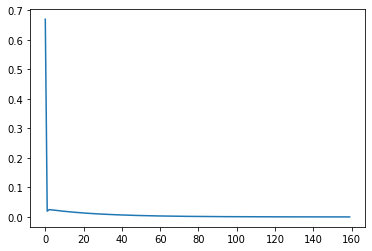

In [118]:
plt.plot(list(range(len(weight_evolution))), weight_evolution)

Визуализируем решение на графике

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


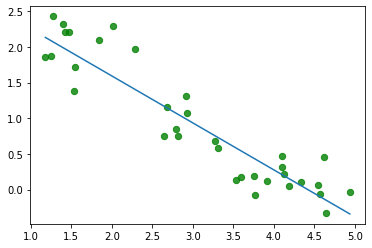

In [123]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(
    data.x_train, data.y_train,
    s=40, c='g', marker='o', alpha=0.8
)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


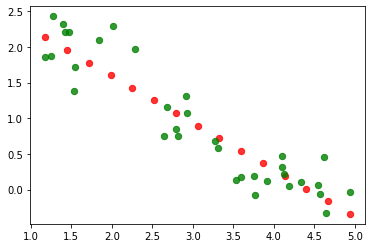

In [124]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=15)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.scatter(
    x_linspace, y_linspace,
    s=40, c='r', marker='o', alpha=0.8
)
plt.scatter(
    data.x_train, data.y_train,
    s=40, c='g', marker='o', alpha=0.8
)

plt.show()

Готово! Мы получили решение задачи линейной регрессии, обучив параметры линейной регресии небольшими "шажками". Мы не использовали сложных матричных вычислений - тем не менее получили линию регрессии, которая лежит в середине облака точек. Когда стоит использовать градиентный спуск в реальных задачах?

* когда данных очень много - в этом случае компьютер может не справится с перемножением матриц
* когда нужно контролировать точность обучения - остановить итерации можно в любой момент (не дожидаясь, пока дойдем до "идеальных" значений.

Когда не стоит применять градиентный спуск? Когда данных мало - в этом случае лучше воспользоваться точным решением

**Практическое задание** очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения на валидационной выборке

2022-01-30 14:23:00,355 : INFO : Обучение закончилось
2022-01-30 14:23:00,357 : INFO : Количество пройденных итераций 198


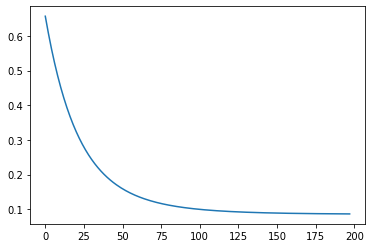

In [140]:
#-------- ВАШ КОД ТУТ -------------------
sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.007, # чем больше этот параметр, тем быстрее. Это самое подходящая цифра, чтобы ГД закончился примерно за 200 шагов.
    fit_intercept=True,
    random_state=RANDOM_SEED
)

w_current = np.random.random(1)
epsilon = 0.0001 
weight_evolution, rmse_evolution = [], []
MAX_STEPS = 800
for step in range(MAX_STEPS):
  # шаг градиентного спуска
  sgd_regressor.partial_fit(X_train, y_train)
  # эволюция (изменение) весов
  weight_distance = euclidean(sgd_regressor.coef_, w_current)
  if weight_distance < epsilon:
    logger.info('Обучение закончилось')
    break
  # контроль на отложенной выборке
  y_valid_predicted = sgd_regressor.predict(X_valid) 
  rmse_current = mean_squared_error(y_valid, y_valid_predicted) 
  weight_evolution.append(weight_distance)
  rmse_evolution.append(rmse_current)
  w_current = sgd_regressor.coef_.copy()

#----------------------------------------
logger.info('Количество пройденных итераций %d', len(rmse_evolution))
plt.plot(list(range(len(rmse_evolution))), rmse_evolution)





#----------------------------------------

## Реализация GD на python

Формулы см. в лекции

In [125]:
import numpy as np

def gradient(X, y, w, alpha=0) -> np.array:
    """Вычисляем градиент в точке"""
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # вычисляем градиент и ошибку
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

Делаем шаг градиентного спуска

In [126]:
from scipy.spatial import distance

def eval_w_next(X, y, eta, w_current):
    """Делаем шаг градиентного спуска"""
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

Повторяем шаги (1,2) до сходимости

In [128]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            logger.info("step %s |w-w_next|=%.5f, grad=%s", step, weight_evolution, grad)
    return w

Запускаем обучение

In [129]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(
    X,
    data['y_train'].values.reshape(-1, 1),
    eta=0.008
)

2022-01-30 14:15:28,634 : INFO : step 100 |w-w_next|=0.00590, grad=[-0.70865209  0.2047155 ]
2022-01-30 14:15:28,641 : INFO : step 200 |w-w_next|=0.00486, grad=[-0.58316809  0.16846566]
2022-01-30 14:15:28,648 : INFO : step 300 |w-w_next|=0.00400, grad=[-0.47990407  0.13863474]
2022-01-30 14:15:28,654 : INFO : step 400 |w-w_next|=0.00329, grad=[-0.39492544  0.11408611]
2022-01-30 14:15:28,663 : INFO : step 500 |w-w_next|=0.00271, grad=[-0.32499434  0.0938844 ]
2022-01-30 14:15:28,672 : INFO : step 600 |w-w_next|=0.00223, grad=[-0.26744623  0.0772599 ]
2022-01-30 14:15:28,682 : INFO : step 700 |w-w_next|=0.00183, grad=[-0.2200884   0.06357916]
2022-01-30 14:15:28,691 : INFO : step 800 |w-w_next|=0.00151, grad=[-0.18111643  0.05232093]
2022-01-30 14:15:28,701 : INFO : step 900 |w-w_next|=0.00124, grad=[-0.14904538  0.04305625]
2022-01-30 14:15:28,708 : INFO : step 1000 |w-w_next|=0.00102, grad=[-0.12265329  0.0354321 ]


У нас произошло несколько сотен итераций, на каждой итерации мы:
* вычисляем вектор весов
* смотрим расстояние между новым вектором весов и векторов весов с предыдущего шага
* если изменения в векторе весов небольшие (скажем, четвёртый знак поcле запятой) - останавливаем итерации

Когда вектор перестаёт меняться - говорят, что алгоритм "сошёлся" (имеется в виду сходимость к оптимальной точке) - это значит, что итерации можно останавливать.

In [130]:
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

визуализируем результаты

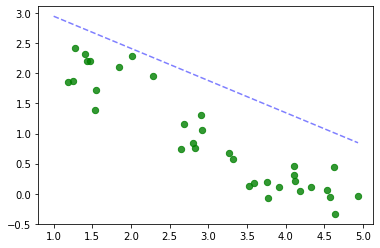

In [131]:
# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.show()